In [1]:
import re
import networkx as nx

In [3]:
import pandas as pd
df = pd.read_csv('./data/smartphone.csv', encoding='utf-8')

galaxy_posts = df.get('Title') + " " + df.get('Description')
galaxy_post_date = df.get('Post Date')

In [5]:
from eunjeon import Mecab

tagger = Mecab()
galaxy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galaxy_stop_words = galaxy_stop_words.split(' ')
galaxy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [6]:
galaxy_nouns = []
nouns = []
for post in galaxy_posts:
    for noun in tagger.nouns(post):
        if noun not in galaxy_stop_words:
            nouns.append(noun)
    galaxy_nouns.append(nouns)

In [7]:
!pip install gensim

In [8]:
import gensim

galaxy_bigram = gensim.models.Phrases(galaxy_nouns)
# 명사에 대하여 bigram 형태로 만들어 사용 
galaxy_trigram = gensim.models.Phrases(galaxy_bigram[galaxy_nouns])
# bigram으로 묶인 명사를 trigram으로 묶어 사용 

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [9]:
galaxy_bigram, galaxy_trigram

(<gensim.models.phrases.Phrases at 0x1a9c16cfc40>,
 <gensim.models.phrases.Phrases at 0x1a9c3e10ac0>)

In [10]:
galaxy_bigram_model = gensim.models.phrases.Phraser(galaxy_bigram)
galaxy_trigram_model = gensim.models.phrases.Phraser(galaxy_trigram)

In [11]:
from gensim import corpora
galaxy_bigram_document = [galaxy_bigram_model[nouns] for nouns in galaxy_nouns]
galaxy_bigram_document[1]

['초등학생',
 '스마트폰',
 '관리',
 '앱',
 '걱정',
 '제',
 '최근',
 '고민',
 '부분',
 '아이',
 '스마트폰',
 '필요',
 '때문',
 '생각',
 '아이패드',
 '에어',
 '어린이',
 '블루투스',
 '헤드셋_포켓몬스터',
 '마우스',
 '패드',
 '세트_플라키',
 '키',
 '물병',
 '가방',
 '아이폰',
 '사전',
 '예약',
 '출시',
 '가격',
 '정보',
 '애플',
 '보급',
 '스마트폰',
 '애플',
 '보급',
 '스마트폰',
 '아이폰',
 '출시',
 '보통',
 '대부분',
 '스마트폰',
 '급',
 '스마트폰',
 '성능',
 '좌우_칩',
 '기준',
 '애플',
 '경우',
 '파격',
 '시그',
 '처',
 '모델',
 '스마트폰',
 '삼각대',
 '추천',
 '후기',
 '스마트폰',
 '삼각대',
 '구매',
 '생각',
 '비교',
 '스마트폰',
 '삼각대',
 '추천',
 '망부석',
 '삼각대',
 '스마트폰',
 '백업',
 '필요',
 '네이버',
 '박스',
 '최근',
 '컴퓨터',
 '노트북',
 '소지',
 '스마트폰',
 '태블릿',
 '스마트',
 '기기',
 '사용',
 '컴퓨터',
 '경우',
 '파일',
 '탐색기',
 '형식',
 '사용',
 '맥',
 '갤럭시',
 '스마트폰',
 '연결',
 '백업',
 '스마트폰',
 '스마트',
 '스위치',
 '앱',
 '설치',
 '경우',
 '맥',
 '로드',
 '버튼',
 '클릭',
 '갤럭시',
 '자동',
 '설치',
 '진행',
 '가능',
 '스마트폰',
 '스마트',
 '위치',
 '앱',
 '설치',
 '스마트폰',
 '규칙',
 '정리',
 '공개',
 '가족_밴드',
 '스마트폰',
 '규칙',
 '정리',
 '달',
 '간',
 '시범',
 '기간',
 '잔소리_남편',
 '아이',
 '스마트폰',
 '사용',
 '규칙',
 '의논',
 '제',
 '의견',
 '반영',

In [13]:
# bigram 문서에 대해 id와 word로 매핑된 딕셔너리 생성 
galaxy_id2word = corpora.Dictionary(galaxy_bigram_document)
# doc2bow 함수 >> (단어, 빈도수) 형태로 변환
galaxy_corpus = [galaxy_id2word.doc2bow(doc) for doc in galaxy_bigram_document]
galaxy_corpus[0]

[(0, 1),
 (1, 58),
 (2, 1),
 (3, 84),
 (4, 4),
 (5, 1),
 (6, 3),
 (7, 8),
 (8, 9),
 (9, 1),
 (10, 4),
 (11, 8),
 (12, 14),
 (13, 1),
 (14, 2),
 (15, 1),
 (16, 2),
 (17, 8),
 (18, 5),
 (19, 4),
 (20, 27),
 (21, 1),
 (22, 3),
 (23, 22),
 (24, 4),
 (25, 1),
 (26, 2),
 (27, 2),
 (28, 3),
 (29, 1),
 (30, 1),
 (31, 4),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 2),
 (36, 1),
 (37, 1),
 (38, 14),
 (39, 2),
 (40, 1),
 (41, 1),
 (42, 116),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 3),
 (47, 2),
 (48, 13),
 (49, 11),
 (50, 381),
 (51, 3),
 (52, 7),
 (53, 7),
 (54, 2),
 (55, 7),
 (56, 7),
 (57, 16),
 (58, 4),
 (59, 3),
 (60, 68),
 (61, 1),
 (62, 6),
 (63, 3),
 (64, 3),
 (65, 3),
 (66, 268),
 (67, 1),
 (68, 52),
 (69, 2),
 (70, 1),
 (71, 5),
 (72, 3),
 (73, 1),
 (74, 2),
 (75, 1),
 (76, 9),
 (77, 64),
 (78, 7),
 (79, 26),
 (80, 11),
 (81, 1),
 (82, 10),
 (83, 20),
 (84, 1),
 (85, 4),
 (86, 2),
 (87, 20),
 (88, 3),
 (89, 3),
 (90, 12),
 (91, 1),
 (92, 2),
 (93, 23),
 (94, 16),
 (95, 26),
 (96, 14),
 (97, 2),
 (

- 토픽모델링에서 적절한 토픽을 찾기 위는 방법
  - 2~9까지 값을 늘려가며 lda 모델 생성 
  - 각 모델의 정합도(coherence) 계산 

- 적절한 토픽수 
  - 토픽 개수 늘리면서 정합 점수(coherence score) 증가하다 감소하는 지점의 값으로 결정`

In [14]:
from gensim.models import CoherenceModel

galaxy_coherence_score=[]

for i in range(2,10):
    model = gensim.models.ldamodel.LdaModel(corpus=galaxy_corpus, id2word=galaxy_id2word, num_topics=i)
    coherence_model = CoherenceModel(model, texts=galaxy_bigram_document, dictionary=galaxy_id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('n=',i,'\nCoherence Score: ', coherence_lda)
    galaxy_coherence_score.append(coherence_lda)

n= 2 
Coherence Score:  0.3381998834522544
n= 3 
Coherence Score:  0.34096385247321814
n= 4 
Coherence Score:  0.3375655316329469
n= 5 
Coherence Score:  0.31108448231074914
n= 6 
Coherence Score:  0.33308399009153605
n= 7 
Coherence Score:  0.3349644378894361
n= 8 
Coherence Score:  0.3318585373025559
n= 9 
Coherence Score:  0.33657086596413766


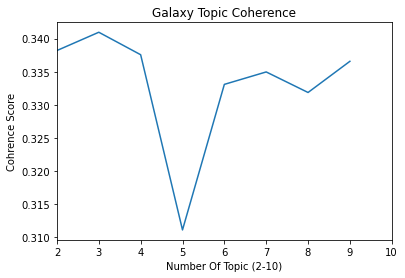

In [15]:
import matplotlib.pyplot as plt
import numpy

k=[]
for i in range(2,10):
    k.append(i)

x=numpy.array(k)
y=numpy.array(galaxy_coherence_score)
plt.title('Galaxy Topic Coherence')
plt.plot(x,y)
plt.xlim(2,10)
plt.xlabel('Number Of Topic (2-10)')
plt.ylabel('Cohrence Score')
plt.show()

In [16]:
# 급격히 감소하는 3을 적절한 토픽 개수로 판단
galaxy_model = gensim.models.ldamodel.LdaModel(corpus=galaxy_corpus, id2word=galaxy_id2word, num_topics=3)
galaxy_model.print_topics()

[(0,
  '0.123*"스마트폰" + 0.019*"사진" + 0.013*"사용" + 0.011*"강의" + 0.011*"갤럭시" + 0.010*"앱" + 0.010*"스마트" + 0.009*"반응" + 0.009*"제작" + 0.008*"동영상"'),
 (1,
  '0.118*"스마트폰" + 0.025*"사진" + 0.012*"갤럭시" + 0.012*"사용" + 0.012*"강의" + 0.010*"반응" + 0.009*"카메라" + 0.009*"스마트" + 0.009*"제작" + 0.009*"동영상"'),
 (2,
  '0.143*"스마트폰" + 0.019*"강의" + 0.014*"사용" + 0.012*"사진" + 0.012*"갤럭시" + 0.009*"카메라" + 0.009*"동영상" + 0.009*"유튜브" + 0.008*"삼성" + 0.008*"활용"')]

In [17]:
!pip install pyLDAvis

In [ ]:
#!conda install -c conda-forge pyldavis

In [18]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

prepared_data = gensimvis.prepare(galaxy_model, galaxy_corpus, galaxy_id2word)
pyLDAvis.display(prepared_data)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


### 역동적 토픽모델링 

- 시간에 따라 변하는 토픽을 살펴보기 위해 사용하는 기법

In [19]:
galaxy_nouns_date={}

for i in range(len(galaxy_posts)):
    if galaxy_post_date[i] in galaxy_nouns_date:
        galaxy_nouns_date[galaxy_post_date[i]].append(galaxy_nouns[i])
    else:
        galaxy_nouns_date[galaxy_post_date[i]]=[]
        galaxy_nouns_date[galaxy_post_date[i]].append(galaxy_nouns[i])

galaxy_nouns_date = sorted(galaxy_nouns_date.items())
galaxy_nouns_date[0]

(20180302,
 [['초등학생',
   '스마트폰',
   '관리',
   '앱',
   '걱정',
   '제',
   '최근',
   '고민',
   '부분',
   '아이',
   '스마트폰',
   '필요',
   '때문',
   '생각',
   '아이패드',
   '에어',
   '어린이',
   '블루투스',
   '헤드셋',
   '포켓몬스터',
   '마우스',
   '패드',
   '세트',
   '플라키',
   '키',
   '물병',
   '가방',
   '아이폰',
   '사전',
   '예약',
   '출시',
   '가격',
   '정보',
   '애플',
   '보급',
   '스마트폰',
   '애플',
   '보급',
   '스마트폰',
   '아이폰',
   '출시',
   '보통',
   '대부분',
   '스마트폰',
   '급',
   '스마트폰',
   '성능',
   '좌우',
   '칩',
   '기준',
   '애플',
   '경우',
   '파격',
   '시그',
   '처',
   '모델',
   '스마트폰',
   '삼각대',
   '추천',
   '후기',
   '스마트폰',
   '삼각대',
   '구매',
   '생각',
   '비교',
   '스마트폰',
   '삼각대',
   '추천',
   '망부석',
   '삼각대',
   '스마트폰',
   '백업',
   '필요',
   '네이버',
   '박스',
   '최근',
   '컴퓨터',
   '노트북',
   '소지',
   '스마트폰',
   '태블릿',
   '스마트',
   '기기',
   '사용',
   '컴퓨터',
   '경우',
   '파일',
   '탐색기',
   '형식',
   '사용',
   '맥',
   '갤럭시',
   '스마트폰',
   '연결',
   '백업',
   '스마트폰',
   '스마트',
   '스위치',
   '앱',
   '설치',
   '경우',
   '맥',
   '로드',
   '버튼',
   '클

In [20]:
# 시간에 따라 분류된 명사들이 있는 데이터에서 시간별로 명사들이 있는 문서 개수 계산 

galaxy_nouns_dates=[]
galaxy_date_length=[]

for i in range(len(galaxy_nouns_date)):
    galaxy_nouns_dates.append(galaxy_nouns_date[i][1])
    galaxy_date_length.append(len(galaxy_nouns_date[i][1]))

galaxy_date_length[0:20]

[2, 4, 5, 1, 3, 3, 3, 2, 4, 5, 3, 4, 5, 3, 4, 4, 4, 4, 2, 5]

In [21]:
# 시간별로 명사들이 있는 데이터 통합 

galaxy_merged_dates=[]

for posts in galaxy_nouns_dates:
    for post in posts:
        galaxy_merged_dates=galaxy_merged_dates+[post]

galaxy_merged_dates[0]

['초등학생',
 '스마트폰',
 '관리',
 '앱',
 '걱정',
 '제',
 '최근',
 '고민',
 '부분',
 '아이',
 '스마트폰',
 '필요',
 '때문',
 '생각',
 '아이패드',
 '에어',
 '어린이',
 '블루투스',
 '헤드셋',
 '포켓몬스터',
 '마우스',
 '패드',
 '세트',
 '플라키',
 '키',
 '물병',
 '가방',
 '아이폰',
 '사전',
 '예약',
 '출시',
 '가격',
 '정보',
 '애플',
 '보급',
 '스마트폰',
 '애플',
 '보급',
 '스마트폰',
 '아이폰',
 '출시',
 '보통',
 '대부분',
 '스마트폰',
 '급',
 '스마트폰',
 '성능',
 '좌우',
 '칩',
 '기준',
 '애플',
 '경우',
 '파격',
 '시그',
 '처',
 '모델',
 '스마트폰',
 '삼각대',
 '추천',
 '후기',
 '스마트폰',
 '삼각대',
 '구매',
 '생각',
 '비교',
 '스마트폰',
 '삼각대',
 '추천',
 '망부석',
 '삼각대',
 '스마트폰',
 '백업',
 '필요',
 '네이버',
 '박스',
 '최근',
 '컴퓨터',
 '노트북',
 '소지',
 '스마트폰',
 '태블릿',
 '스마트',
 '기기',
 '사용',
 '컴퓨터',
 '경우',
 '파일',
 '탐색기',
 '형식',
 '사용',
 '맥',
 '갤럭시',
 '스마트폰',
 '연결',
 '백업',
 '스마트폰',
 '스마트',
 '스위치',
 '앱',
 '설치',
 '경우',
 '맥',
 '로드',
 '버튼',
 '클릭',
 '갤럭시',
 '자동',
 '설치',
 '진행',
 '가능',
 '스마트폰',
 '스마트',
 '위치',
 '앱',
 '설치',
 '스마트폰',
 '규칙',
 '정리',
 '공개',
 '가족',
 '밴드',
 '스마트폰',
 '규칙',
 '정리',
 '달',
 '간',
 '시범',
 '기간',
 '잔소리',
 '남편',
 '아이',
 '스마트폰',
 '사용',
 '규칙',
 '의논',

In [34]:
import gensim
from gensim import corpora

def docLDA(nouns):
    bigram = gensim.models.Phrases(nouns)
    trigram = gensim.models.Phrases(bigram[nouns])
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    bigram_document = [bigram_mod[doc] for doc in nouns]
    id2word = corpora.Dictionary(bigram_document)

    corpus = [id2word.doc2bow(doc) for doc in bigram_document]
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=6)
    
    return model, corpus, id2word

In [35]:
import warnings 
warnings.filterwarnings("ignore")

galaxy_model, galaxy_corpus, galaxy_id2word = docLDA(galaxy_nouns)
galaxy_model.print_topics()

[(0,
  '0.142*"스마트폰" + 0.015*"강의" + 0.013*"사용" + 0.011*"사진" + 0.011*"갤럭시" + 0.011*"카메라" + 0.009*"동영상" + 0.009*"스마트" + 0.008*"제작" + 0.007*"앱"'),
 (1,
  '0.125*"스마트폰" + 0.017*"사용" + 0.016*"강의" + 0.015*"사진" + 0.011*"갤럭시" + 0.008*"제작" + 0.008*"앱" + 0.008*"카메라" + 0.008*"동영상" + 0.008*"삼성"'),
 (2,
  '0.096*"스마트폰" + 0.020*"사진" + 0.016*"갤럭시" + 0.015*"강의" + 0.013*"사용" + 0.010*"카메라" + 0.010*"반응" + 0.009*"제작" + 0.008*"촬영" + 0.008*"동영상"'),
 (3,
  '0.128*"스마트폰" + 0.019*"사용" + 0.014*"강의" + 0.014*"사진" + 0.012*"갤럭시" + 0.010*"촬영" + 0.010*"유튜브" + 0.009*"동영상" + 0.009*"삼성" + 0.008*"반응"'),
 (4,
  '0.139*"스마트폰" + 0.018*"강의" + 0.018*"사진" + 0.011*"갤럭시" + 0.011*"사용" + 0.010*"카메라" + 0.009*"앱" + 0.009*"유튜브" + 0.008*"활용" + 0.008*"반응"'),
 (5,
  '0.138*"스마트폰" + 0.017*"사진" + 0.015*"강의" + 0.014*"사용" + 0.011*"갤럭시" + 0.010*"동영상" + 0.009*"유튜브" + 0.009*"방법" + 0.008*"삼성" + 0.008*"제작"')]

In [36]:
# LDA 포함된 각 토픽들에 대해 반환 
def getTopics(model):
    topics = []
    for topic in model.print_topics():
        i=1
        model_words=[]
        topic_words=str(topic).split('"')
        for words in topic_words:
            if i%2==0:
                model_words.append(words)
            i+=1
        topics.append(model_words)
    return topics

In [37]:
galaxy_topics = getTopics(galaxy_model)
galaxy_topics

[['스마트폰', '강의', '사용', '사진', '갤럭시', '카메라', '동영상', '스마트', '제작', '앱'],
 ['스마트폰', '사용', '강의', '사진', '갤럭시', '제작', '앱', '카메라', '동영상', '삼성'],
 ['스마트폰', '사진', '갤럭시', '강의', '사용', '카메라', '반응', '제작', '촬영', '동영상'],
 ['스마트폰', '사용', '강의', '사진', '갤럭시', '촬영', '유튜브', '동영상', '삼성', '반응'],
 ['스마트폰', '강의', '사진', '갤럭시', '사용', '카메라', '앱', '유튜브', '활용', '반응'],
 ['스마트폰', '사진', '강의', '사용', '갤럭시', '동영상', '유튜브', '방법', '삼성', '제작']]

In [38]:
# 역동적 토픽모델로 살펴보기 위해서는 문서마다 가지고 있는 토픽들의 크기를 알아야 함 
# 날짜별로 합쳐진 문서마다 토픽들의 크기 계산 

galaxy_topic_size=[]
index=0

for post_len in galaxy_date_length:
    topic_size=[]
    doc=[]
    for i in range(post_len):
        doc+=galaxy_merged_dates[index]
        index+=1
    for model in galaxy_topics:
        count=0
        for noun in doc:
            if noun in model:
                count+=1
        topic_size.append(count)
    galaxy_topic_size.append(topic_size)

galaxy_topic_size[0:10]

[[10868, 10876, 10820, 10756, 10802, 10768],
 [21736, 21752, 21640, 21512, 21604, 21536],
 [27170, 27190, 27050, 26890, 27005, 26920],
 [5434, 5438, 5410, 5378, 5401, 5384],
 [16302, 16314, 16230, 16134, 16203, 16152],
 [16302, 16314, 16230, 16134, 16203, 16152],
 [16302, 16314, 16230, 16134, 16203, 16152],
 [10868, 10876, 10820, 10756, 10802, 10768],
 [21736, 21752, 21640, 21512, 21604, 21536],
 [27170, 27190, 27050, 26890, 27005, 26920]]

In [39]:
# 넘파이 배열 형태로 저장하기 위해 변환 
import numpy as np

galaxy_topic_array=np.array(galaxy_topic_size)
galaxy_topic_array

array([[10868, 10876, 10820, 10756, 10802, 10768],
       [21736, 21752, 21640, 21512, 21604, 21536],
       [27170, 27190, 27050, 26890, 27005, 26920],
       ...,
       [32604, 32628, 32460, 32268, 32406, 32304],
       [32604, 32628, 32460, 32268, 32406, 32304],
       [21736, 21752, 21640, 21512, 21604, 21536]])

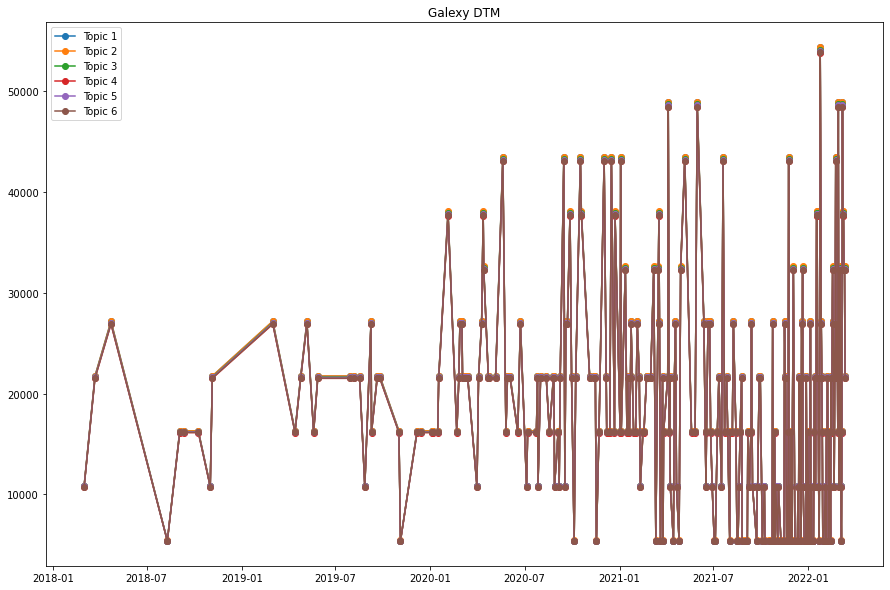

In [40]:
# 시간에 따라 갤럭시 토픽에 대해 토픽 변화 확인하기 
# x축: 시간, y축: 토픽 크기 

import matplotlib.pyplot as plt
import datetime as dt

galaxy_x=[]
galaxy_y=[]

galaxy_topic_1=galaxy_topic_array[:,0]
galaxy_topic_2=galaxy_topic_array[:,1]
galaxy_topic_3=galaxy_topic_array[:,2]
galaxy_topic_4=galaxy_topic_array[:,3]
galaxy_topic_5=galaxy_topic_array[:,4]
galaxy_topic_6=galaxy_topic_array[:,5]

galaxy_unique_date=sorted(list(set(galaxy_post_date)))
galaxy_plt_data=[]
for date in galaxy_unique_date:
    times= dt.datetime.strptime(str(date),'%Y%m%d')
    galaxy_x.append(times)

plt.rcParams["figure.figsize"]=(15,10)
plt.title("Galexy DTM")
plt.plot(galaxy_x, galaxy_topic_1,'o-', label="Topic 1")
plt.plot(galaxy_x, galaxy_topic_2,'o-', label="Topic 2")
plt.plot(galaxy_x, galaxy_topic_3,'o-', label="Topic 3")
plt.plot(galaxy_x, galaxy_topic_4,'o-', label="Topic 4")
plt.plot(galaxy_x, galaxy_topic_5,'o-', label="Topic 5")
plt.plot(galaxy_x, galaxy_topic_6,'o-', label="Topic 6")
plt.legend()
plt.show()

In [41]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [42]:
galaxy_word2vec = Word2Vec(galaxy_nouns, min_count=1)
galaxy_word2vec

In [43]:
galaxy_word2vec.wv.most_similar("핸드폰")

[('분', 0.2758197784423828),
 ('선물', 0.27145928144454956),
 ('글', 0.2664414644241333),
 ('발전', 0.2544040381908417),
 ('눈', 0.2524336874485016),
 ('여러분', 0.25062301754951477),
 ('플릿', 0.24678978323936462),
 ('이색', 0.24200010299682617),
 ('콜', 0.24114303290843964),
 ('연구소', 0.23975388705730438)]

In [44]:
galaxy_tsne = TSNE(n_components=2) # n_components=2 >> 2차원 시각화 위함 
galaxy_tsne

TSNE()

In [45]:
galaxy_vocab = galaxy_word2vec.wv.vocab
galaxy_similarity = galaxy_word2vec[galaxy_vocab] # word2vec 나온 어휘에서 유사도 계산
galaxy_similarity

array([[-5.8016319e+00,  4.9930487e+00, -2.1414852e+00, ...,
        -2.1755893e+00,  8.7505519e-01, -2.1263466e+00],
       [ 3.9226773e-01, -8.4163982e-01, -2.4296739e+00, ...,
         3.3071787e+00,  1.2739567e+00,  2.1219025e+00],
       [ 2.9896572e+00,  4.5683079e+00, -4.1145706e+00, ...,
        -1.5254000e+00,  1.5334164e+00,  1.4594264e+00],
       ...,
       [ 4.2509111e-03, -3.2237750e-03,  3.3888756e-03, ...,
        -2.4009822e-03, -8.6112047e-04, -6.9520448e-04],
       [ 4.6288772e-03,  2.7368511e-03, -3.9315755e-03, ...,
         3.6846665e-03, -4.3932670e-03, -2.4782622e-03],
       [-4.7639566e-03,  3.8135115e-03, -4.6051489e-04, ...,
         7.2449906e-04,  1.1341207e-03,  2.8168065e-03]], dtype=float32)

In [46]:
galaxy_transform_similarity = galaxy_tsne.fit_transform(galaxy_similarity)
galaxy_df = pd.DataFrame(galaxy_transform_similarity, index=galaxy_vocab, columns=['x', 'y'])
galaxy_df[0:10]

,x,y
초등학생,-19.743031,19.053284
스마트폰,-13.132171,5.016414
관리,53.099041,3.464528
앱,-1.146648,-0.270906
걱정,-40.013412,-37.923023
제,-8.776972,-65.417206
최근,-17.085581,55.727695
고민,-44.210575,22.275484
부분,-10.544673,-24.876320
아이,3.138763,-37.440769


In [47]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

(-86.0157844543457, 130.189688873291, -109.39050064086913, 83.6338020324707)

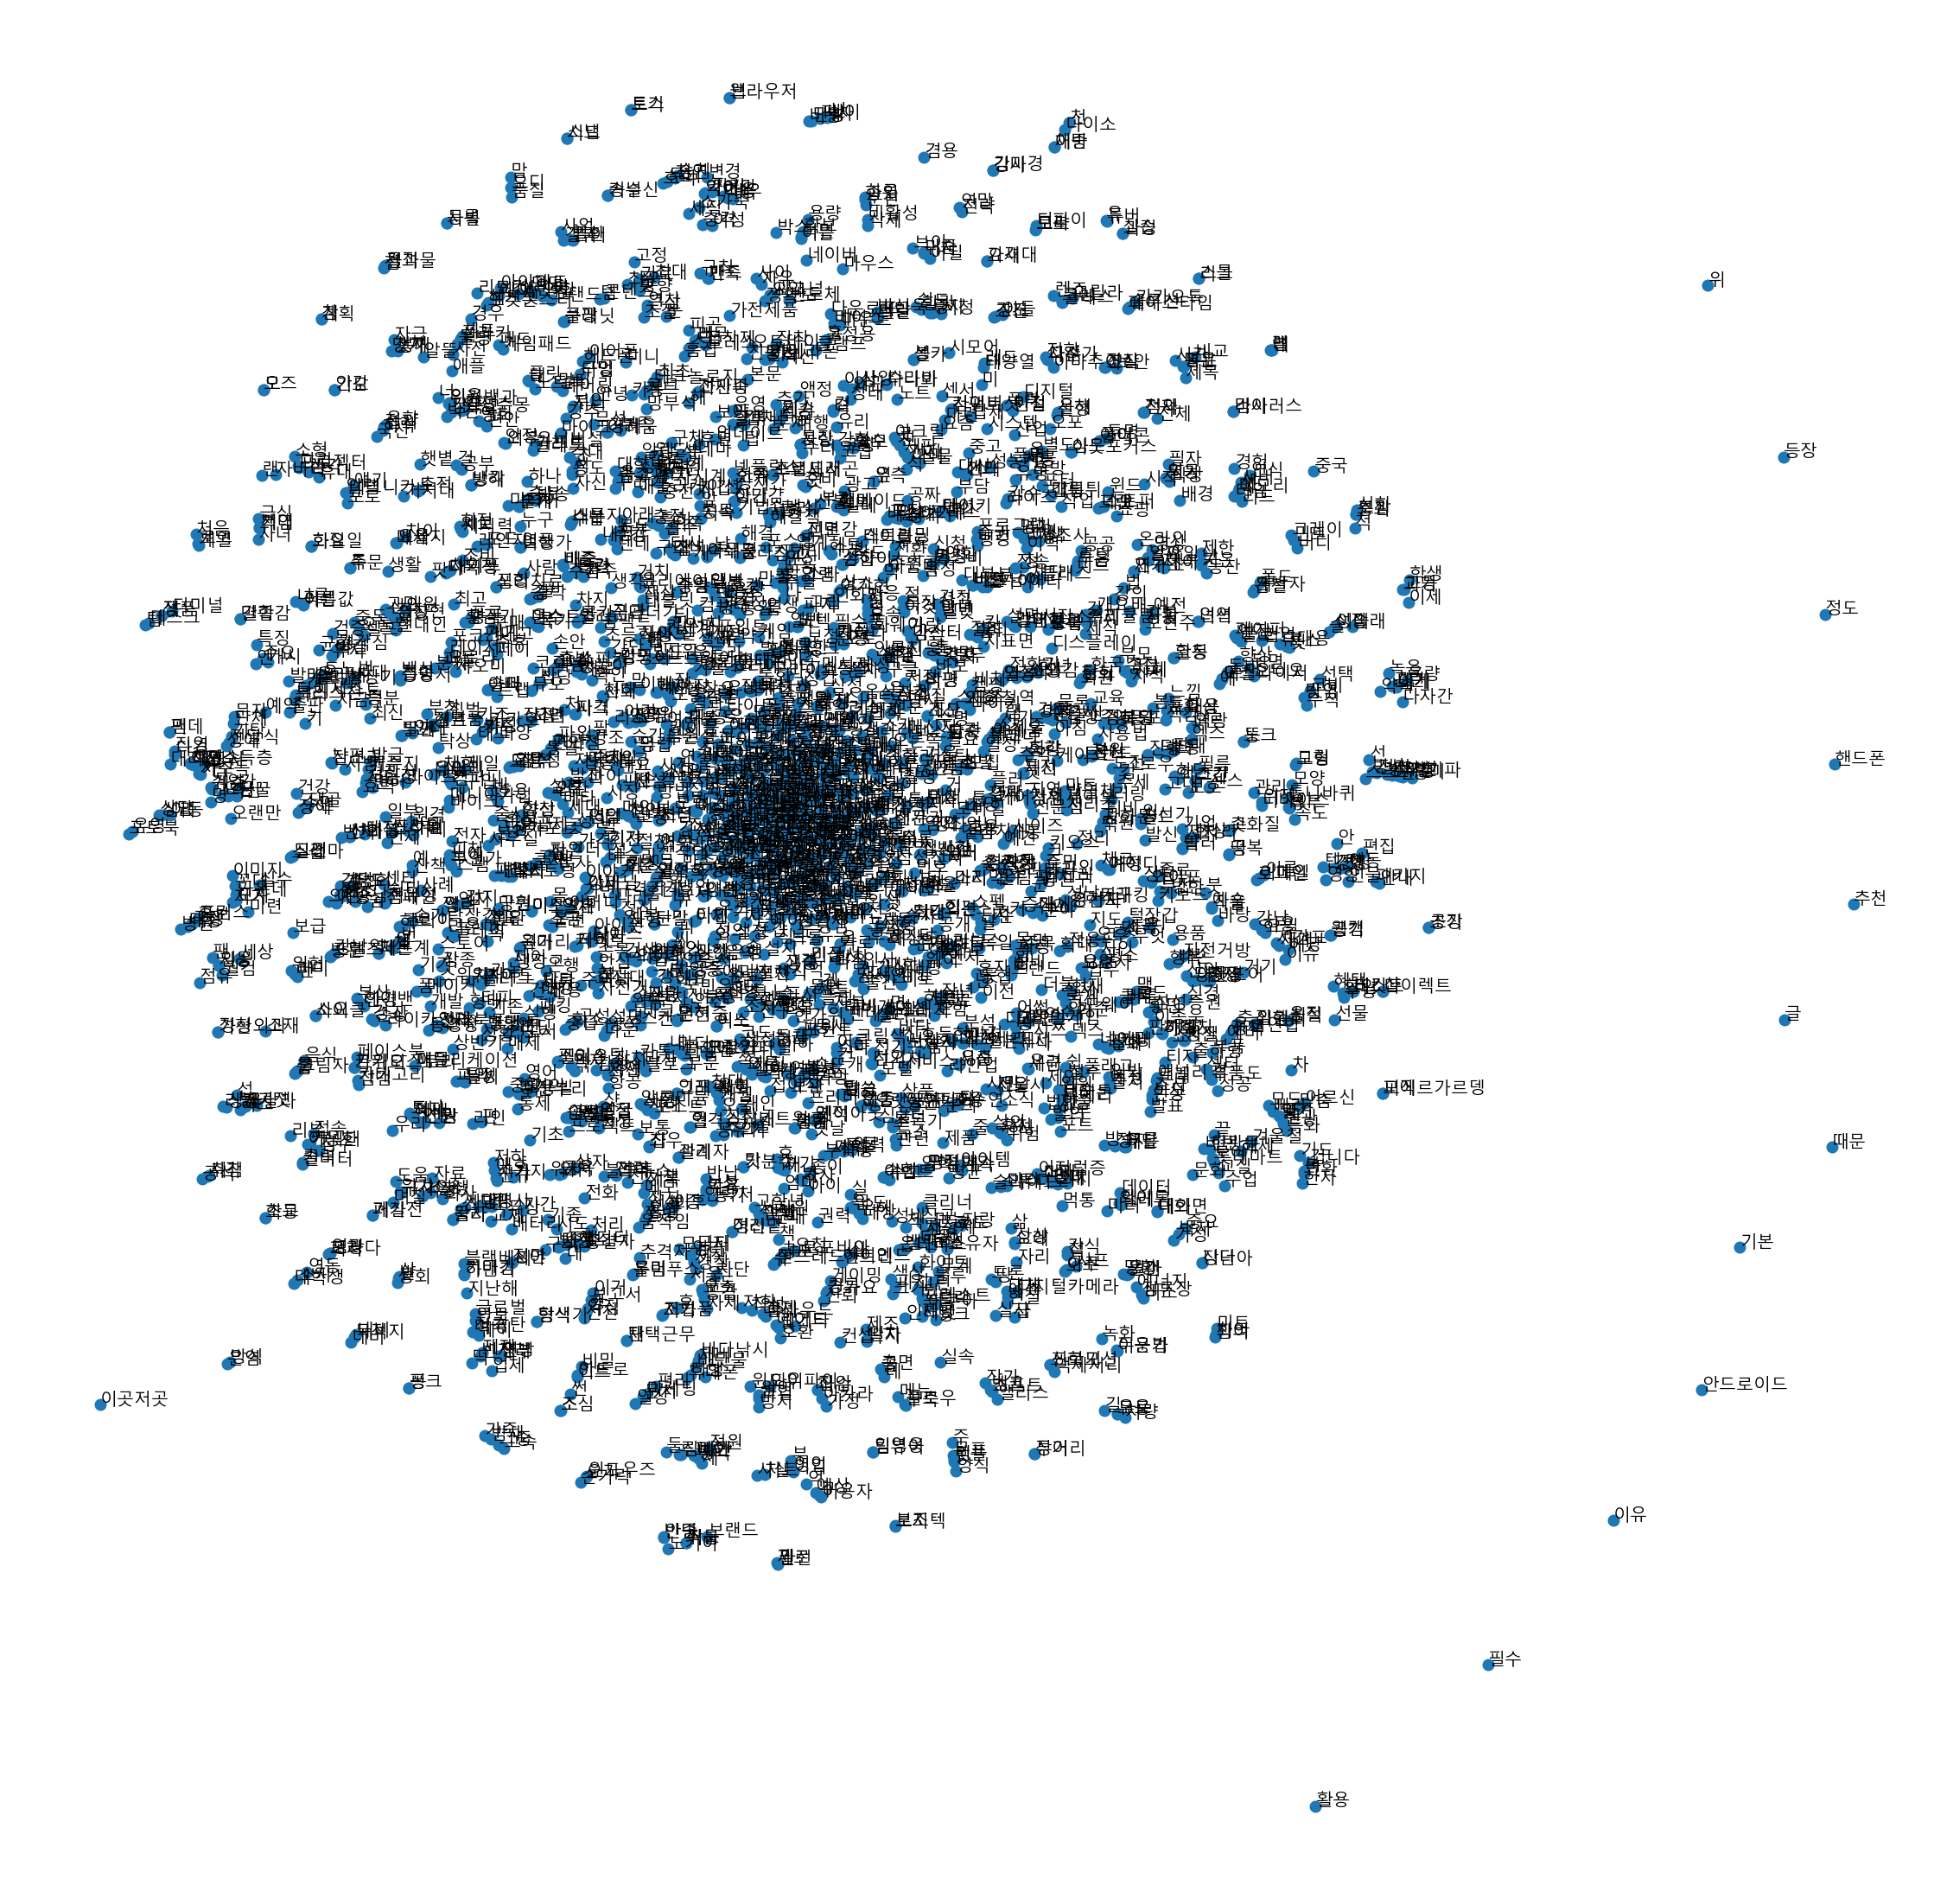

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(20, 20)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(galaxy_df['x'], galaxy_df['y'])
for word, pos in galaxy_df.iterrows():
    ax.annotate(word, pos)
ax.axis("off")